# Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook! Only the notebook file will be submitted, do not change the data filenames, file content or paths we'll use the provided ones.

Student name: Matteo Bortoletto <br>
ID Number: 1146169 (this is my old ID, i'm graduating in december)

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the full dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains the height, weight and age.

From Wikipedia:

The **Center** (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

**Point Guards** (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features (regressors) are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
We will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
IDnumber = 1146169 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
#load the dataset
filename = 'data/NBA.csv' # do not change the file name or content
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:4] #columns 1,2,3 contain the features
Y = dataset[:,0]  # column 0: labels

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m) # random permurtation

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (1/4 of the data in the first set, 3/4 in the second one)

In [71]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

#m_test needs to be the number of samples in the test set
m_test = X.shape[0] // 4 # PLACE YOUR CODE

#m_training needs to be the number of samples in the training set
m_training = X.shape[0] - m_test # PLACE YOUR CODE

#X_training = instances for training set
X_training = X[:m_training, :] # PLACE YOUR CODE
#Y_training = labels for the training set
Y_training = Y[:m_training] # PLACE YOUR CODE

#X_test = instances for test set
X_test = X[m_training:, :] # PLACE YOUR CODE
#Y_test = labels for the test set
Y_test = Y[m_training:] # PLACE YOUR CODE

print(Y_training) #to make sure that Y_training contains both 1 and -1
print(m_test)

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1  1  1  1 -1
  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1
 -1  1  1  1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1
  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1  1
  1 -1 -1  1  1 -1 -1 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1
 -1  1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1  1  1  1  1 -1 -1 -1  1  1
  1  1  1  1 -1 -1 -1  1  1 -1  1  1  1  1  1 -1 -1  1 -1  1  1  1 -1 -1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1
  1  1  1]
65
Shape of training set: (195, 3)
Shape of test set: (65, 3)


**TO DO** Now add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [72]:
#add a 1 to each sample (homogeneous coordinates)

# PLACE YOUR CODE

X_training = np.hstack((np.ones((m_training, 1)), X_training))
X_test = np.hstack((np.ones((m_test,1)), X_test))

**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

In [73]:
def perceptron(X, Y, max_num_iterations):
    
    # PLACE YOUR CODE
    
    # initialize best_w, i.e. the vector with the coefficients of the best model
    best_w = np.zeros(len(X[0]))
    # initialize best_error, i.e. the fraction of missclassified samples for the best model
    best_error = 1
    # initialize w
    w = np.zeros(len(X[0]))
    # initialize t
    t = 1 
    
    while t <= max_num_iterations:
        #initialize a counter for wrongly classified samples
        wrongly_class_count = 0
        # initialize a list to store wrongly classified samples
        wrongly_class_list = []
        # try to find wrongly classified samples, i.e. such that y_i * <w(t),x_i> <= 0
        for i in range(len(Y)):
            if Y[i]*np.dot(w, X[i]) <= 0:
                wrongly_class_list.append(i)
        # if there are no missclassified samples break
        if len(wrongly_class_list) == 0: 
            print('Break after =', max_num_interations, 'iterations.')
            break
        # draw a randon number n to which will be used to pick a x_i and update w
        n = wrongly_class_list[np.random.randint(0, len(wrongly_class_list))]
        # update w
        w += Y[n]*X[n,:]
        # find the number of wrongly classified after the update
        for i in range(len(Y)):
            if Y[i]*np.dot(w, X[i]) <= 0: 
                wrongly_class_count += 1
        # if the "current best error" is greater than
        # (number of wrongly classified samples / number of samples), update best_w and best_error
        if best_error > wrongly_class_count / len(Y):
            best_w = w.copy()
            best_error = wrongly_class_count / len(Y)
        if t == max_num_iterations:
            print('Maximum number of iterations have been completed:', max_num_iterations)
        # update t
        t += 1
    
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [75]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print(w_found)
print("Training Error of perceptron (100 iterations): " + str(error))

Maximum number of iterations have been completed: 100
[ -1. -40.  86. -31.]
Training Error of perceptron (100 iterations): 0.1282051282051282


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (the test error that is an estimate of the true loss).

In [76]:
#now use the w_found to make predictions on test dataset

num_errors = 0

# PLACE YOUR CODE to compute the number of errors
for i in range(m_test):
    if Y_test[i]*np.dot(w_found, X_test[i]) <= 0:
        num_errors += 1

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perceptron (100 iterations): " + str(true_loss_estimate))

Test Error of perceptron (100 iterations): 0.15384615384615385


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**
The test error is bigger than the training error. This is what we expect, since we want to produce a predictor that minimizes the training error.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 5000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [77]:
#now run the perceptron for 5000 iterations here!

# PLACE YOUR CODE

w_found, error = perceptron(X_training,Y_training, 5000)
print(w_found)
print("Training Error of perceptron (5000 iterations): " + str(error))

num_errors = 0

# PLACE YOUR CODE to compute the number of errors
for i in range(m_test):
    if Y_test[i]*np.dot(w_found, X_test[i]) <= 0:
        num_errors += 1

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perceptron (5000 iterations): " + str(true_loss_estimate))

Maximum number of iterations have been completed: 5000
[  -8. -459.  993. -209.]
Training Error of perceptron (5000 iterations): 0.07179487179487179
Test Error of perceptron (5000 iterations): 0.09230769230769231


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
The training error obtained with 100 iterations appears to be a bit larger than that obtained with 5000 iterations (0.9 vs 1.0 circa). The same holds for the test error (0.7 vs 0.8 circa). But I noticed that running again the code, the values can change quite significantly. So, I made a plot of errors vs. number of iterations  and I saw that the two values become stable (0.077 for the test error and 0.092 for the training error circa) around 200 iterations. Furthermore, I found that the test error is bigger than the training error: it is obvious, since the `w` that we use is found using the training set.

Maximum number of iterations have been completed: 100
Maximum number of iterations have been completed: 200
Maximum number of iterations have been completed: 300
Maximum number of iterations have been completed: 400
Maximum number of iterations have been completed: 500
Maximum number of iterations have been completed: 600
Maximum number of iterations have been completed: 700
Maximum number of iterations have been completed: 800
Maximum number of iterations have been completed: 900
Maximum number of iterations have been completed: 1000
Maximum number of iterations have been completed: 1100
Maximum number of iterations have been completed: 1200
Maximum number of iterations have been completed: 1300
Maximum number of iterations have been completed: 1400
Maximum number of iterations have been completed: 1500
Maximum number of iterations have been completed: 1600
Maximum number of iterations have been completed: 1700
Maximum number of iterations have been completed: 1800
Maximum number of i

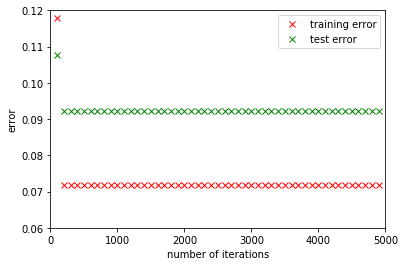

In [78]:
iterations = [i for i in range(0, 5000,100)]
training_err = []
test_err = []

for i in iterations:

    w_found, error = perceptron(X_training,Y_training, i)
    training_err.append(error)

    num_errors = 0

    for j in range(m_test):
        if Y_test[j]*np.dot(w_found, X_test[j]) <= 0: 
            num_errors += 1

    test_err_i = num_errors/m_test
    test_err.append(test_err_i)
    
print('training error: \n', training_err, '\n', 'test error: \n', test_err)

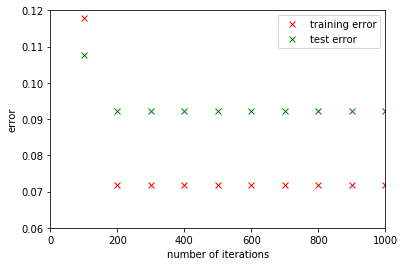

In [83]:
plt.plot(iterations, training_err, 'rx', label='training error')
plt.plot(iterations, test_err, 'gx', label='test error')
plt.axis([0,1000,0.06,0.12])
plt.legend()
plt.xlabel('number of iterations')
plt.ylabel('error')
plt.show()

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [103]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to {-1, 1} as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [119]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

m_training = len(X[:,0]) // 2 # PLACE YOUR CODE
m_test = len(X[:, 0]) - m_training # PLACE YOUR CODE

X_training = X[:m_training, :] # PLACE YOUR CODE
Y_training = Y[:m_training] # PLACE YOUR CODE

X_test = X[m_training:, :] # PLACE YOUR CODE
Y_test = Y[m_training:] # PLACE YOUR CODE

X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

130


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [105]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C = 1e5) # PLACE YOUR CODE

#learn from training set

# PLACE YOUR CODE
logreg.fit(X_training, Y_training)

#predict on training set

# PLACE YOUR CODE
Y_training_predict = logreg.predict(X_training)

#print the error rate = fraction of missclassified samples
error_rate_training = 0
n_errors_training = 0

# PLACE YOUR CODE
for i in range(m_training):
    if Y_training[i]*Y_training_predict[i] <= 0: 
        n_errors_training += 1

error_rate_training = n_errors_training / m_training

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

# PLACE YOUR CODE
Y_test_predict = logreg.predict(X_test)

#print the error rate = fraction of missclassified samples
error_rate_test = 0 

# PLACE YOUR CODE
n_errors_test = 0

for i in range(m_test):
    if Y_test[i]*Y_test_predict[i] <= 0: 
        n_errors_test += 1

error_rate_test = n_errors_test / m_test

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.07692307692307693
Error rate on test set: 0.06153846153846154


/Users/borto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [123]:
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

index_feature1 = 0 # select a feature
index_feature2 = 1 # select a feature
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[:m_training, :] # PLACE YOUR CODE
Y_training = Y[:m_training] # PLACE YOUR CODE

X_test = X_reduced[m_training:, :] # PLACE YOUR CODE
Y_test = Y[m_training:] # PLACE YOUR CODE

Now learn a model using the training data and measure the performances.

In [126]:
# learning from training data

#ADD CODE! (only for learning from training data)
logreg.fit(X_training, Y_training)

Y_training_predict = logreg.predict(X_training)

n_errors_test1 = 0

for i in range(X_test.shape[0]):
    if Y_test[i]*Y_test_predict[i] <= 0: 
        n_errors_test1 += 1

error_rate_test1 = n_errors_test1 / m_test

print("Error rate on test set: " + str(error_rate_test1))

Error rate on test set: 0.4846153846153846


/Users/borto/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3** I selected height and weight because they are the most important features, age in not very meaningful. 

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

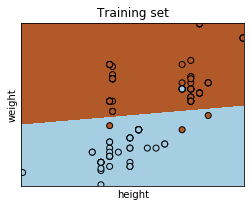

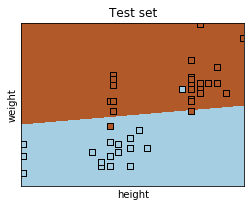

In [108]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()